In [1]:
import torch

import sys
sys.path.append("../")

from prototype.user_profile_host.recommender import (SinglePointRecommender, SinglePointWeightedAxesRecommender, BayesianRecommender)
from prototype.user_profile_host.utils import display_generated_points

/home/phahn/venvs/mmll/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


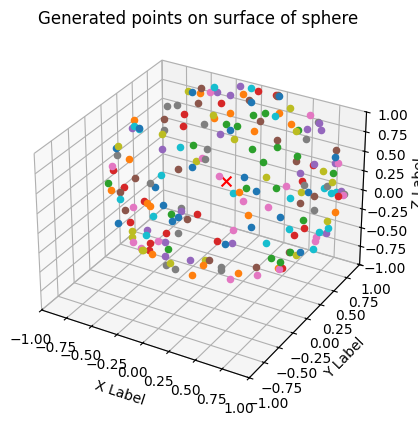

single point tensor([[-7.2630e-01,  4.0302e-01, -2.2536e-01],
        [-4.7910e-01,  1.0079e+00,  4.0945e-01],
        [ 7.2865e-01,  9.6288e-01,  1.4895e-01],
        [ 1.5800e-01,  9.5976e-01,  9.4761e-01],
        [ 2.7083e-01, -2.0676e-01,  1.1974e+00],
        [ 2.4339e-01,  3.3191e-01,  1.2808e+00],
        [ 4.8728e-01, -4.0489e-01, -3.9579e-01],
        [ 1.0549e+00, -5.0939e-02,  4.5886e-01],
        [ 8.3581e-02, -6.9349e-01, -1.4879e-01],
        [-3.7308e-02, -6.2598e-01,  8.4673e-01],
        [-5.0780e-01, -1.9159e-01,  9.9082e-01],
        [-5.6533e-02, -7.5544e-01,  5.5027e-01],
        [ 1.1805e-01, -7.7748e-01,  8.9750e-02],
        [ 5.3300e-01, -7.0133e-01,  3.1053e-01],
        [-4.0518e-02,  6.8318e-01,  1.1642e+00],
        [ 8.9777e-01,  6.5553e-01,  6.9503e-01],
        [-2.1846e-02,  5.5497e-01, -6.2690e-01],
        [-7.1091e-01,  5.9484e-01,  7.3189e-01],
        [ 4.2079e-01,  9.8122e-01, -2.3552e-01],
        [ 1.0700e+00,  2.4744e-02,  1.3165e-01],
       

In [2]:
dummy_user_profile = torch.tensor([0.1, 0.2, 0.3])  # torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# test single point recommender
single_recommender = SinglePointRecommender()
single_point_recommendations = single_recommender.recommend_embeddings(user_profile=dummy_user_profile,
                                                                        n_recommendations=200)
if dummy_user_profile.shape[0] == 3:
    display_generated_points(single_point_recommendations, user_profile=dummy_user_profile)
print("single point", single_point_recommendations)

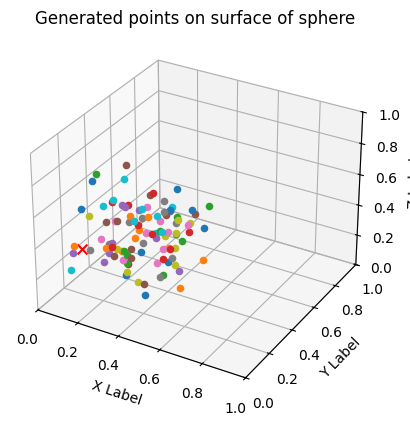

single point + weighted axes tensor([[0.5403, 0.4672, 0.4327],
        [0.3121, 0.2835, 0.4029],
        [0.4999, 0.3095, 0.5926],
        [0.4381, 0.5139, 0.3341],
        [0.3636, 0.3678, 0.3604],
        [0.2289, 0.2786, 0.4838],
        [0.0800, 0.4910, 0.2781],
        [0.1936, 0.5356, 0.3160],
        [0.4474, 0.3018, 0.4532],
        [0.3966, 0.1455, 0.6375],
        [0.4033, 0.4767, 0.6201],
        [0.1683, 0.5428, 0.2223],
        [0.3251, 0.4656, 0.3274],
        [0.5401, 0.1331, 0.4615],
        [0.1705, 0.5469, 0.3541],
        [0.0795, 0.5922, 0.5821],
        [0.4981, 0.1549, 0.4043],
        [0.5034, 0.2678, 0.3554],
        [0.4086, 0.4593, 0.3517],
        [0.2537, 0.5460, 0.2272],
        [0.4302, 0.3495, 0.2421],
        [0.2685, 0.4581, 0.4017],
        [0.3762, 0.1147, 0.4312],
        [0.0715, 0.4829, 0.4088],
        [0.2159, 0.2547, 0.3476],
        [0.4592, 0.1148, 0.2790],
        [0.4904, 0.4168, 0.4627],
        [0.1534, 0.3301, 0.2644],
        [0.4680, 0.

In [3]:
# test single point + weighted axes recommender
latent_bounds = (0., 1.)
embedding_bounds = (0., 1.)
single_weighted_recommender = SinglePointWeightedAxesRecommender(n_latent_axis=1, n_embedding_axis=2,
                                                                    latent_bounds=latent_bounds,
                                                                    embedding_bounds=embedding_bounds,
                                                                    exploration_factor=0.5)
weighted_axes_recommendations = single_weighted_recommender.recommend_embeddings(user_profile=dummy_user_profile,
                                                                                    n_recommendations=100)
if dummy_user_profile.shape[0] == 3:
    display_generated_points(weighted_axes_recommendations, user_profile=dummy_user_profile,
                                x_bounds=embedding_bounds, y_bounds=embedding_bounds, z_bounds=embedding_bounds)
print("single point + weighted axes", weighted_axes_recommendations)